In [1]:
!pip install matplotlib pandas scikit-learn seaborn graphviz

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image, display
from graphviz import Source

In [3]:
#load dataset
df = sns.load_dataset("penguins")

# Drop rows with missing values
df = df.dropna()
display(df)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [4]:
# Feature and label separation
feature = df.drop(columns=["species"])
label = df["species"]

# Convert categorical features
feature = pd.get_dummies(feature)

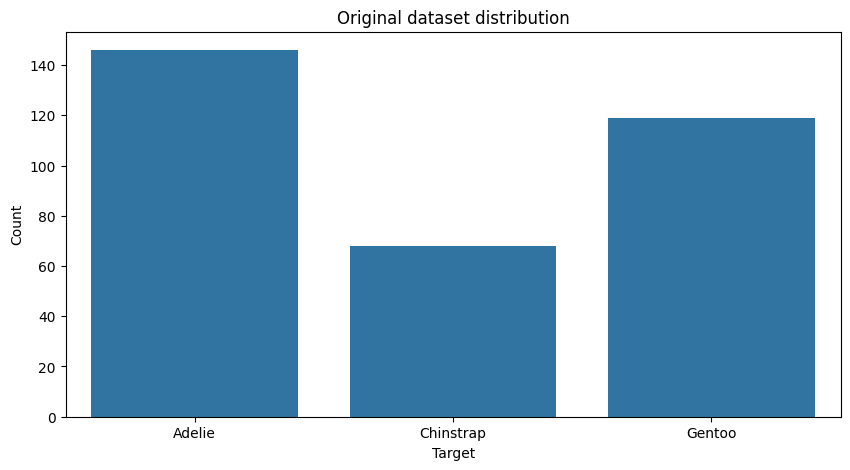

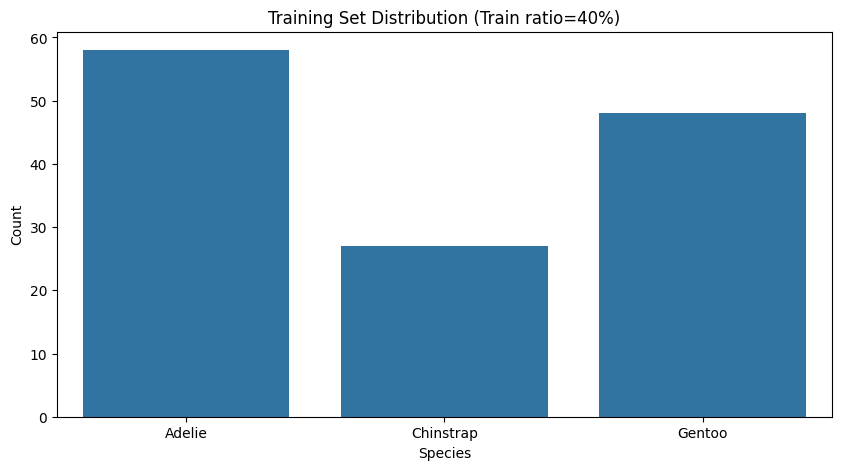

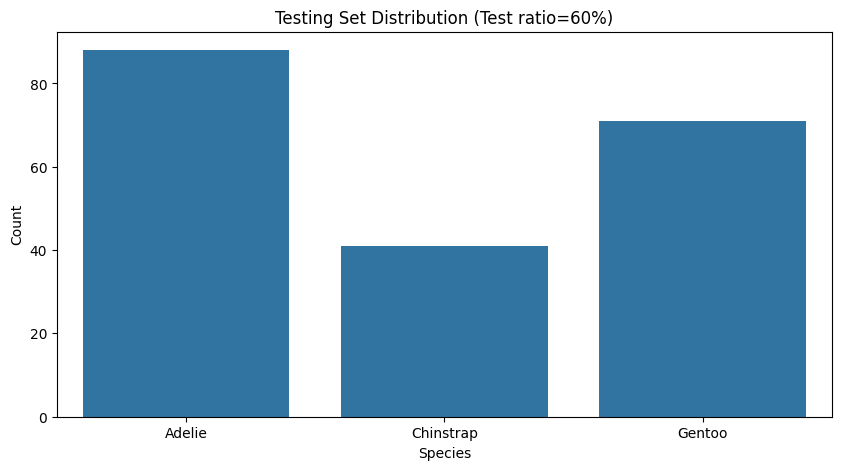

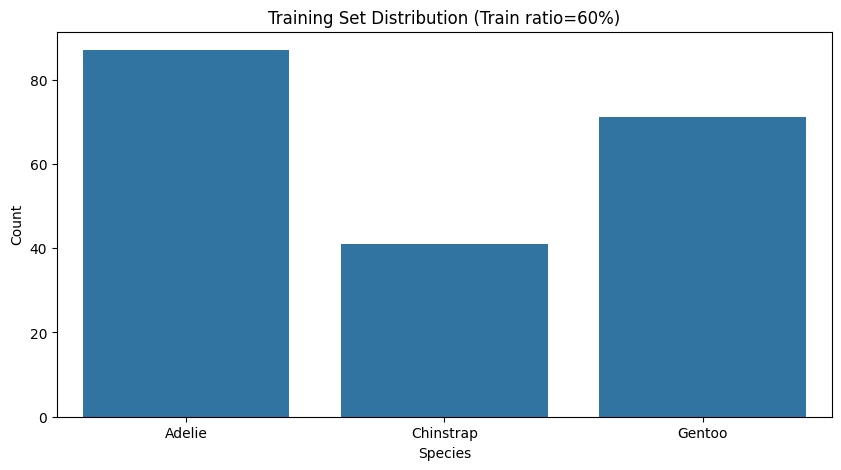

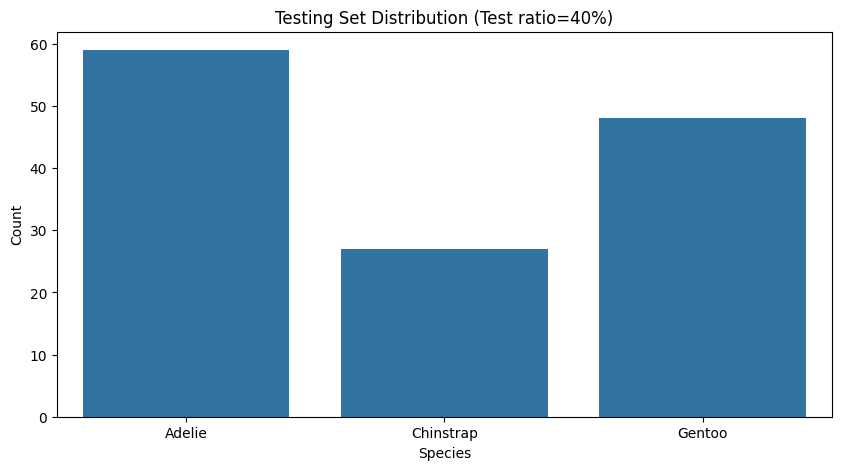

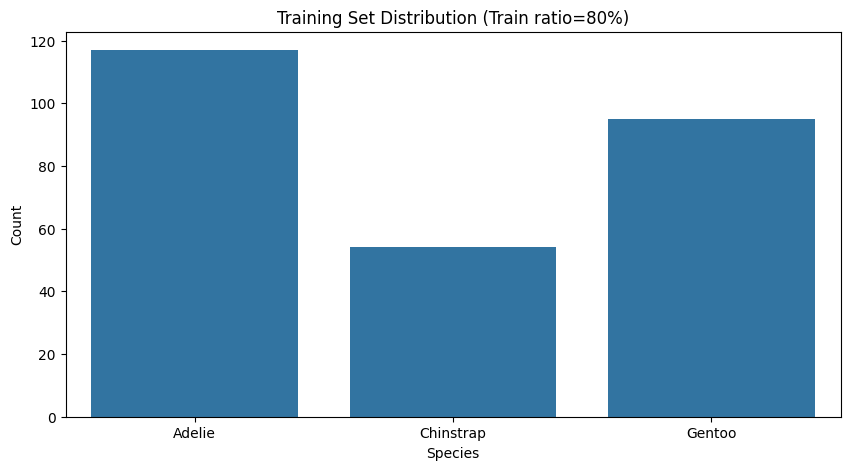

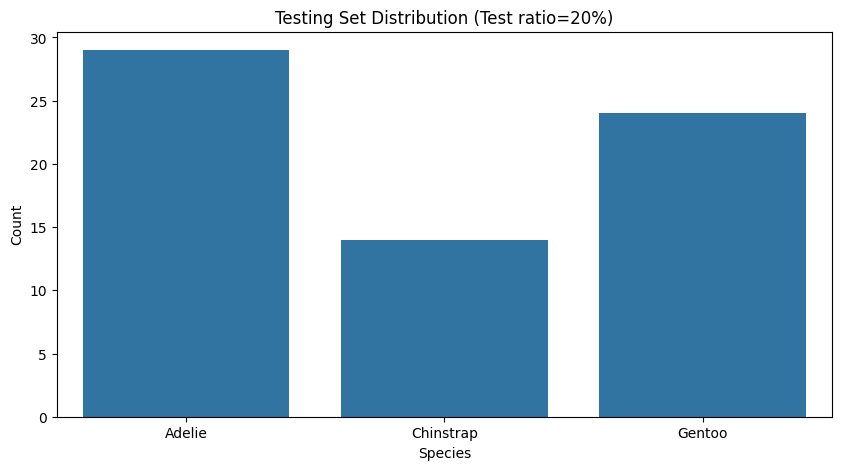

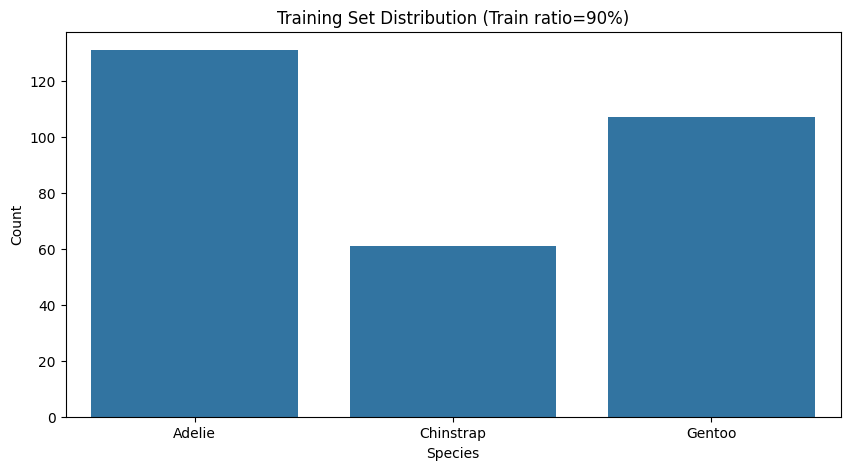

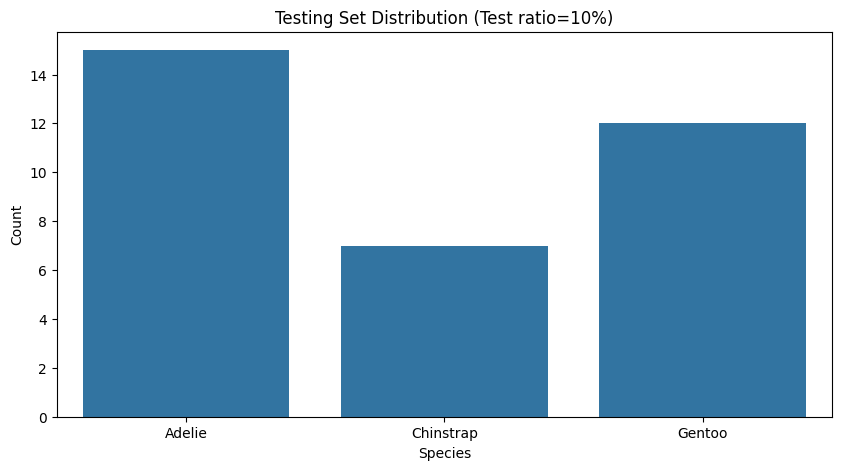

In [5]:
# Train_test_split
order = sorted(label.unique())

# Save split original dataset
split_dir = "../images/PalmerPenguins/SplitDataset"

os.makedirs(split_dir, exist_ok=True)

original_split_file_name = "original.png"
original_split_file_path = os.path.join(split_dir, original_split_file_name)

plt.figure(figsize=(10, 5))
sns.countplot(x=label, order=order)
plt.title(f"Original dataset distribution")
plt.xlabel("Target")
plt.ylabel("Count")
plt.savefig(original_split_file_path)
plt.show()

splits = [0.4, 0.6, 0.8, 0.9]
split_results = {}

for train_ratio in splits:
    feature_train, feature_test, label_train, label_test = train_test_split(
        feature, label, train_size=train_ratio, random_state=42, stratify=label, shuffle=True
    )

    split_results[train_ratio] = {
        "feature_train": feature_train,
        "feature_test": feature_test,
        "label_train": label_train,
        "label_test": label_test
    }

    # Save train split dataset
    train_split_file_name = f"train_{int(train_ratio * 100)}.png"
    train_split_file_path = os.path.join(split_dir, train_split_file_name)

    plt.figure(figsize=(10, 5))
    sns.countplot(x=label_train, order=order)
    plt.title(f"Training Set Distribution (Train ratio={int(train_ratio * 100)}%)")
    plt.xlabel("Species")
    plt.ylabel("Count")
    plt.savefig(train_split_file_path)
    plt.show()

    # Save test split dataset
    test_split_file_name = f"test_{100 - int(train_ratio * 100)}.png"
    test_split_file_path = os.path.join(split_dir, test_split_file_name)

    plt.figure(figsize=(10, 5))
    sns.countplot(x=label_test, order=order)
    plt.title(f"Testing Set Distribution (Test ratio={100 - int(train_ratio * 100)}%)")
    plt.xlabel("Species")
    plt.ylabel("Count")
    plt.savefig(test_split_file_path)
    plt.show()

Train ratio: 0.4, Accuracy: 0.96
              precision    recall  f1-score   support

      Adelie       0.99      0.93      0.96        88
   Chinstrap       0.85      0.98      0.91        41
      Gentoo       1.00      0.99      0.99        71

    accuracy                           0.96       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.96      0.96       200



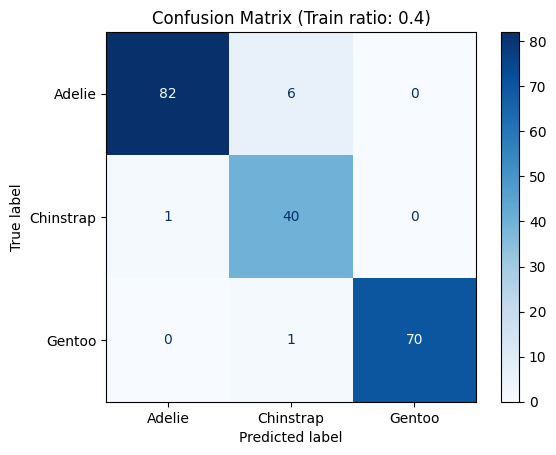

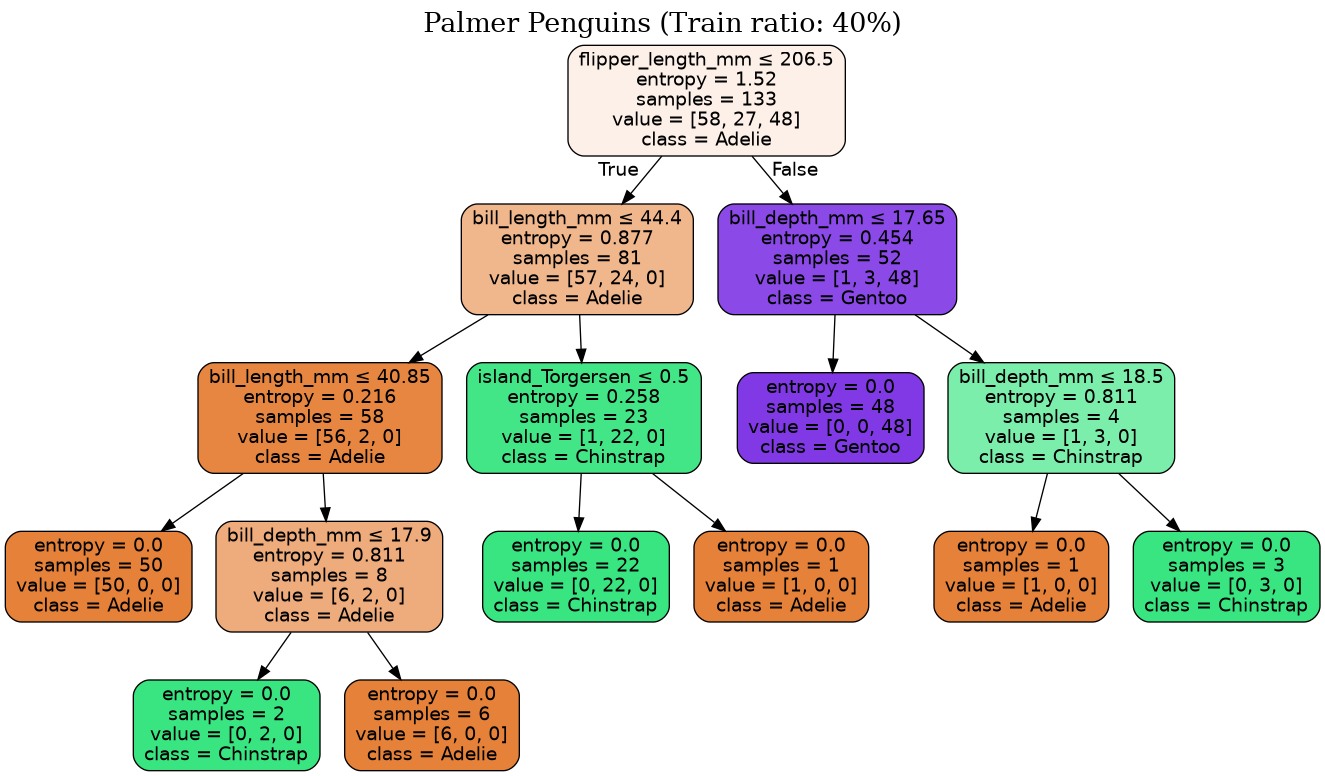

Train ratio: 0.6, Accuracy: 0.9701492537313433
              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        59
   Chinstrap       0.93      1.00      0.96        27
      Gentoo       1.00      0.96      0.98        48

    accuracy                           0.97       134
   macro avg       0.97      0.97      0.97       134
weighted avg       0.97      0.97      0.97       134



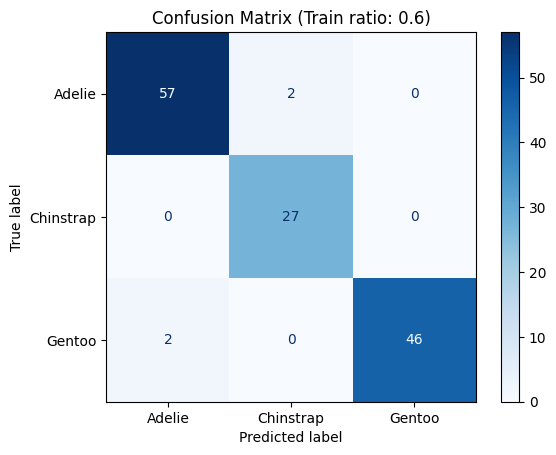

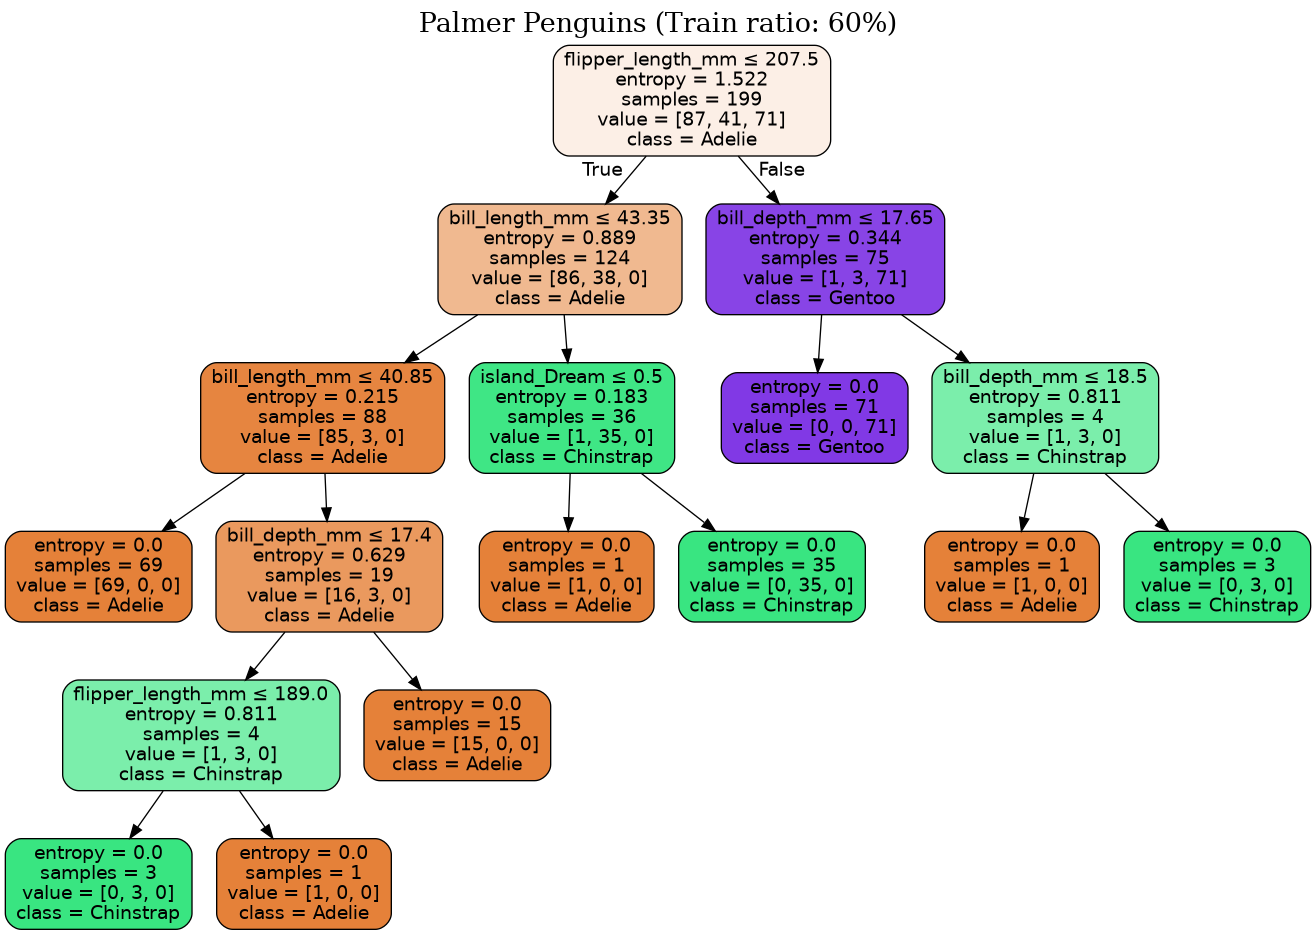

Train ratio: 0.8, Accuracy: 0.9253731343283582
              precision    recall  f1-score   support

      Adelie       0.93      0.90      0.91        29
   Chinstrap       0.82      1.00      0.90        14
      Gentoo       1.00      0.92      0.96        24

    accuracy                           0.93        67
   macro avg       0.92      0.94      0.92        67
weighted avg       0.93      0.93      0.93        67



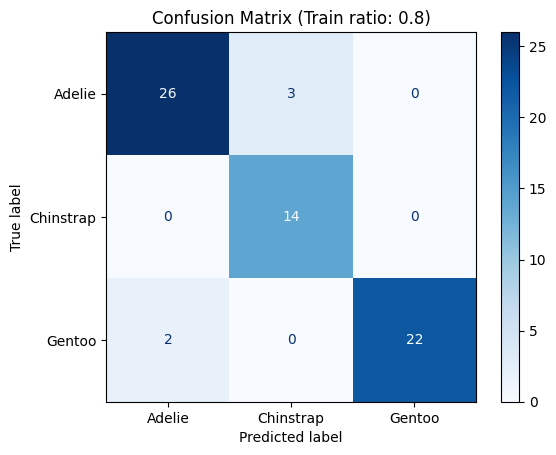

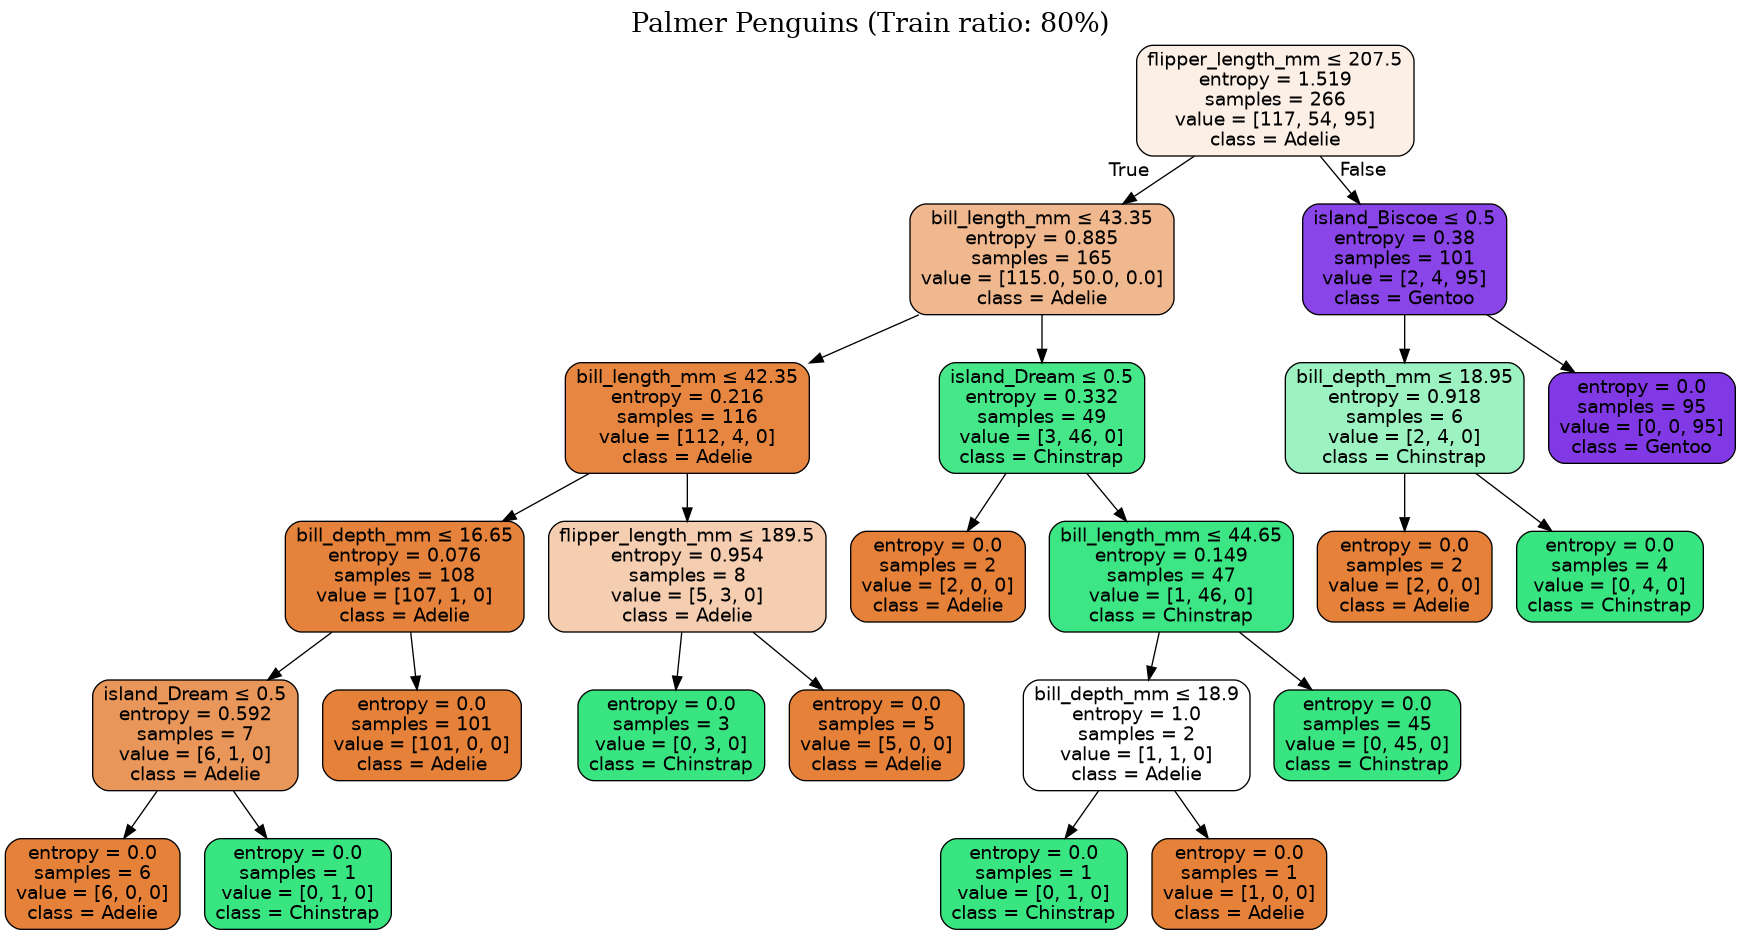

Train ratio: 0.9, Accuracy: 0.9411764705882353
              precision    recall  f1-score   support

      Adelie       0.88      1.00      0.94        15
   Chinstrap       1.00      1.00      1.00         7
      Gentoo       1.00      0.83      0.91        12

    accuracy                           0.94        34
   macro avg       0.96      0.94      0.95        34
weighted avg       0.95      0.94      0.94        34



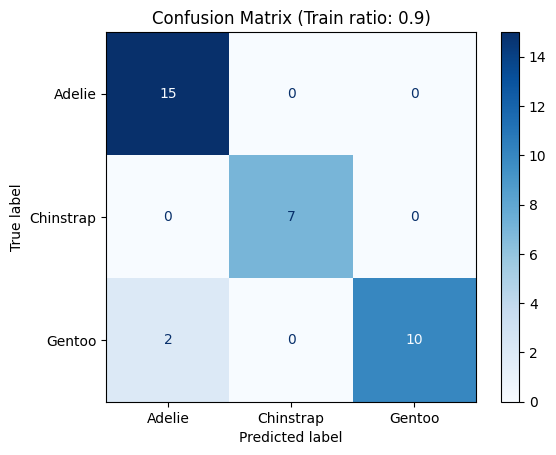

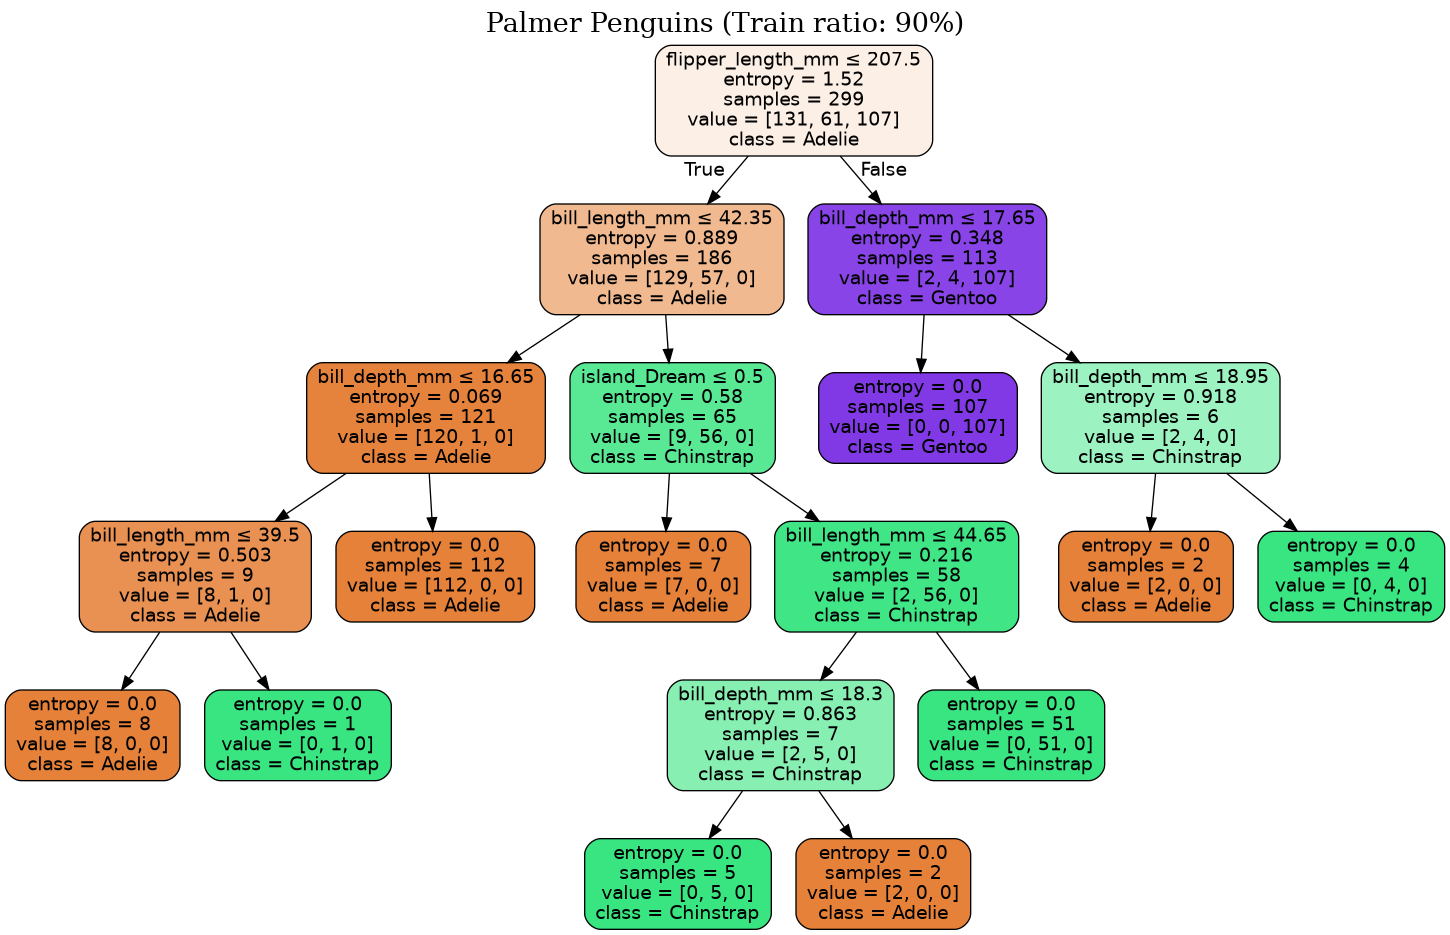

In [6]:
# Decision Tree Classifier
for train_ratio, data in split_results.items():
    feature_train = data["feature_train"]
    feature_test = data["feature_test"]
    label_train = data["label_train"]
    label_test = data["label_test"]

    # Create and train the model
    clf_split = DecisionTreeClassifier(criterion="entropy", random_state=42)
    clf_split.fit(feature_train, label_train)

    # Make label_pred
    label_pred = clf_split.predict(feature_test)

    # Evaluation
    ## Accuracy
    accuracy = accuracy_score(label_test, label_pred)
    print(f"Train ratio: {train_ratio}, Accuracy: {accuracy}")

    ## Classification report
    report = classification_report(label_test, label_pred)
    print(report)

    ## Confusion matrix
    matrix_dir = "../images/PalmerPenguins/ConfusionMatrix"
    os.makedirs(matrix_dir, exist_ok=True)

    matrix_file_name = f"confusion_matrix_{int(train_ratio * 100)}.png"
    matrix_file_path = os.path.join(matrix_dir, matrix_file_name)

    cm = confusion_matrix(label_test, label_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_split.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix (Train ratio: {train_ratio})")
    plt.savefig(matrix_file_path) 
    plt.show()

    # Visualize the decision tree
    dtree_split_dir = "../images/PalmerPenguins/DecisionTree/Split"
    os.makedirs(dtree_split_dir, exist_ok=True)

    file_name = f"dtree_{int(train_ratio * 100)}"
    file_path = os.path.join(dtree_split_dir, file_name)

    title = f"Palmer Penguins (Train ratio: {int(train_ratio * 100)}%)"

    dot_data = export_graphviz(
        clf_split,
        out_file=None,
        feature_names=feature.columns,
        class_names=clf_split.classes_,
        filled=True,
        rounded=True,
        special_characters=True
    )

    dot_data_with_title = dot_data.replace(
        "digraph Tree {",
        f'digraph Tree {{\ngraph [label="{title}", labelloc=top, fontsize=20];'
    )

    graph = Source(dot_data_with_title)
    graph.render(file_path, format="png", cleanup=True)
    display(Image(filename=f"{file_path}.png"))

Max depth: None, Accuracy: 0.93


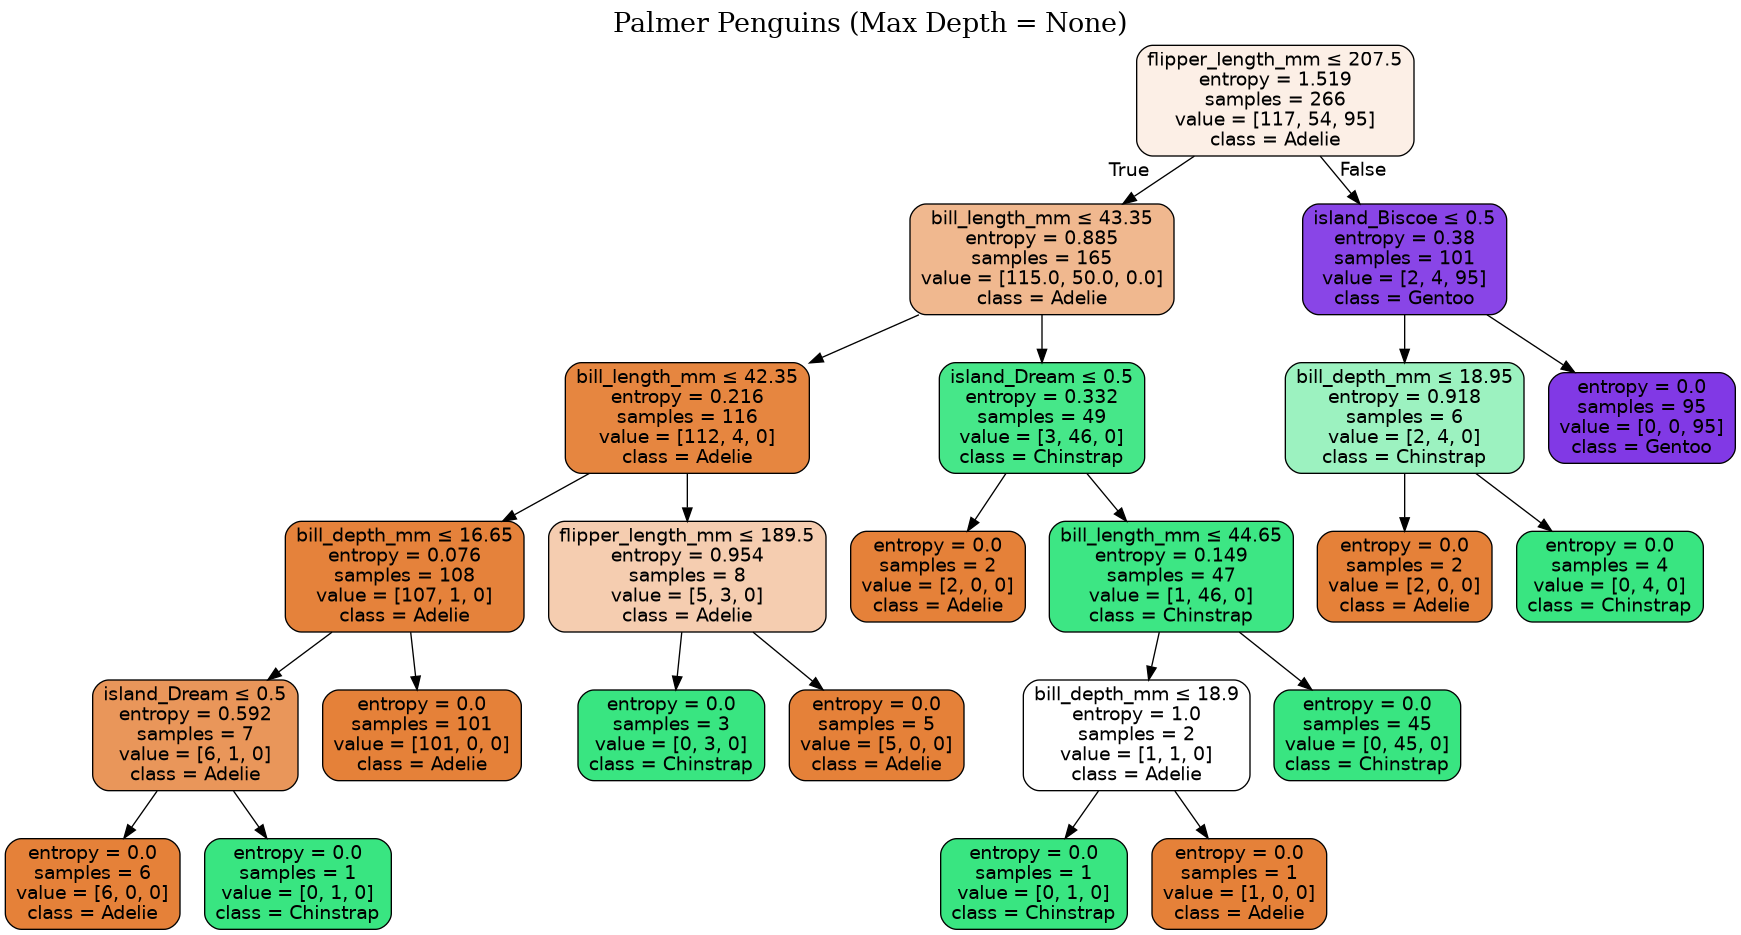

Max depth: 2, Accuracy: 0.94


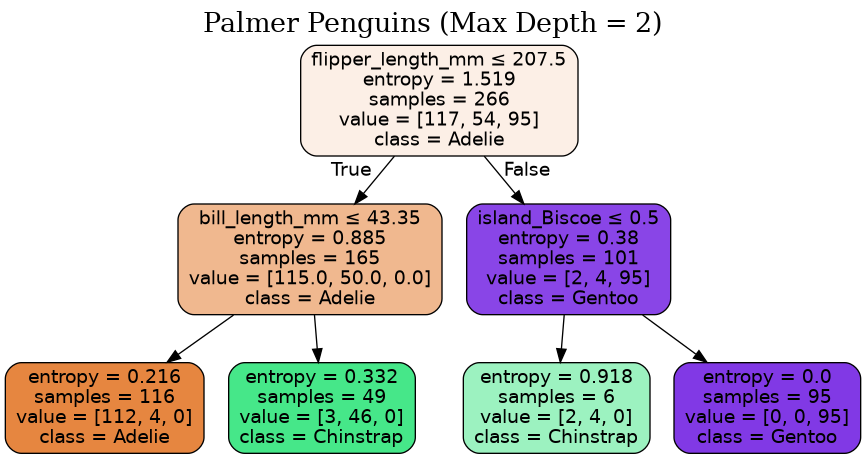

Max depth: 3, Accuracy: 0.96


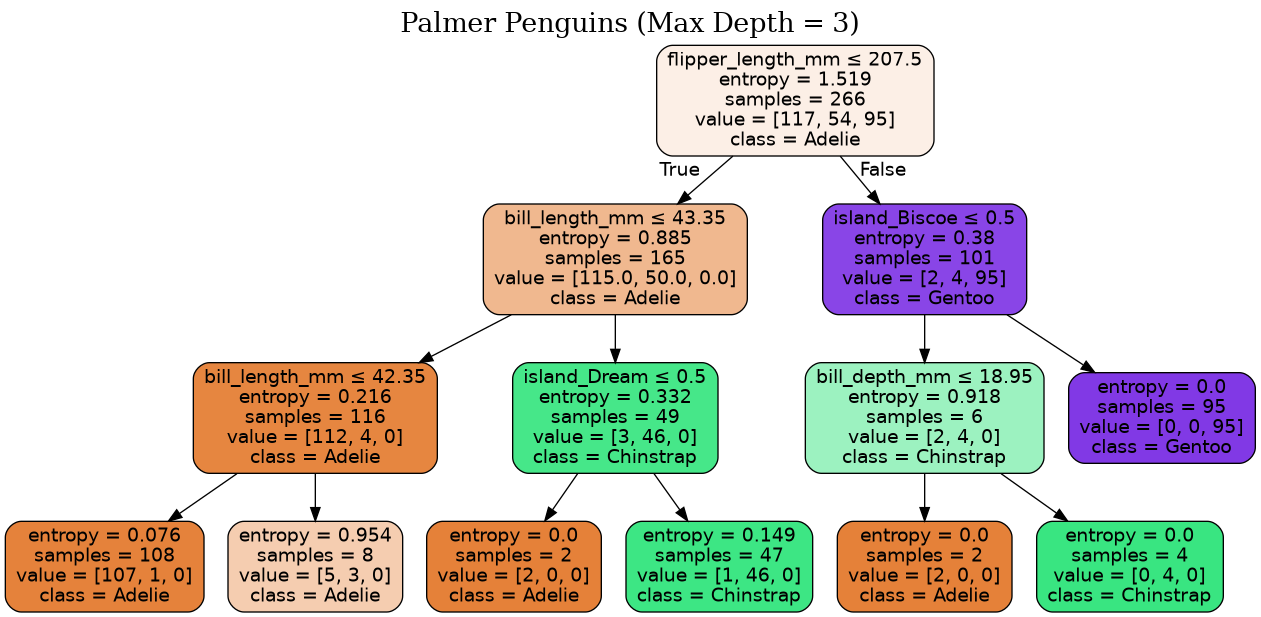

Max depth: 4, Accuracy: 0.97


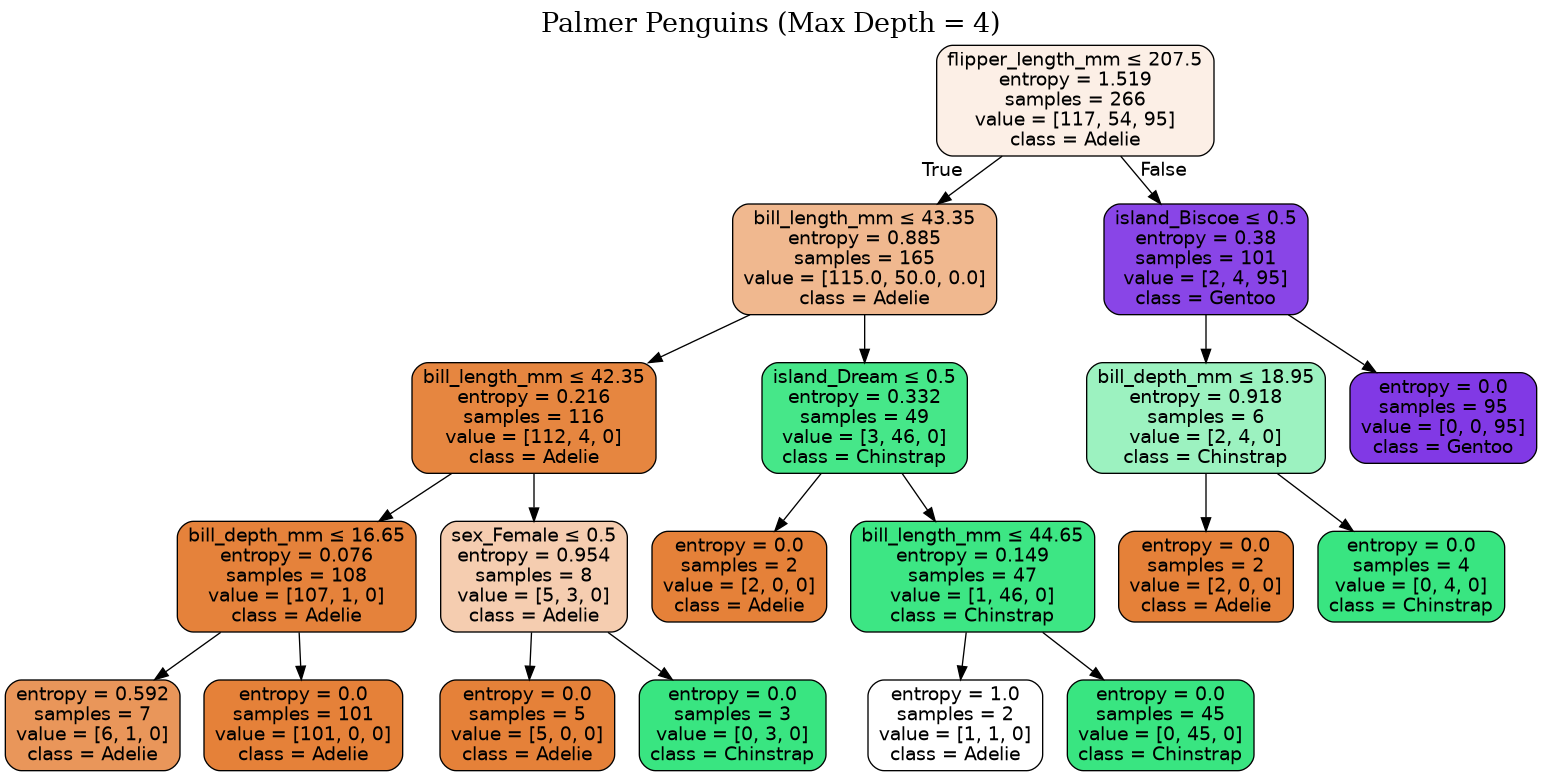

Max depth: 5, Accuracy: 0.93


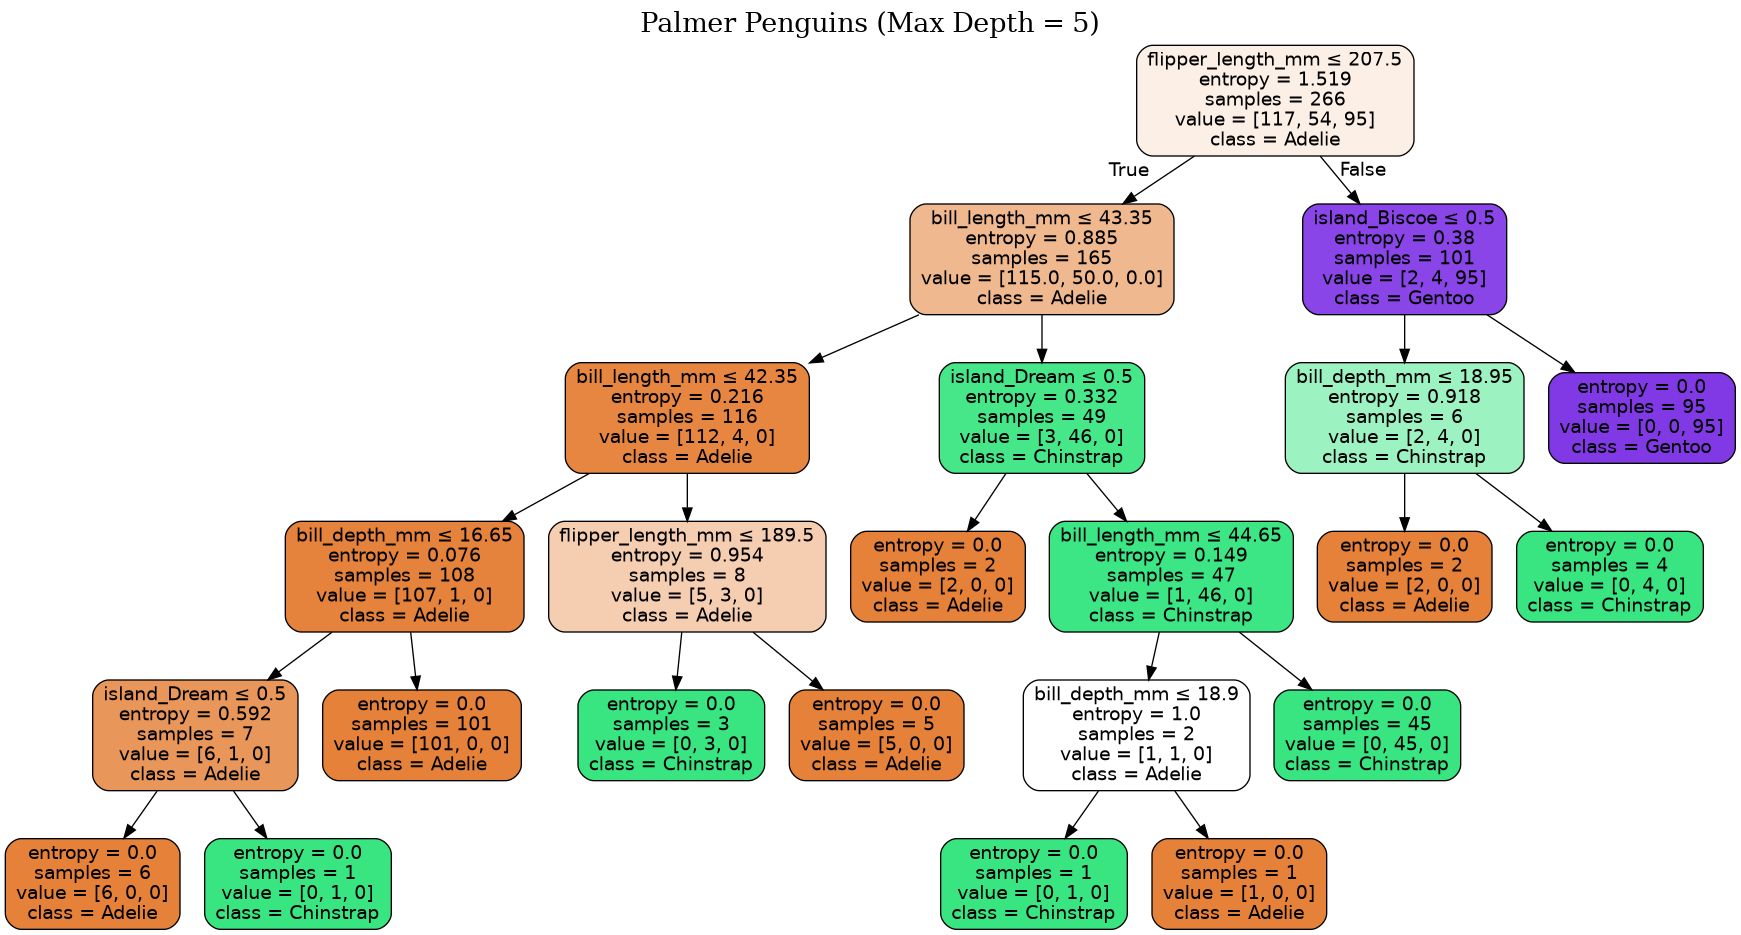

Max depth: 6, Accuracy: 0.93


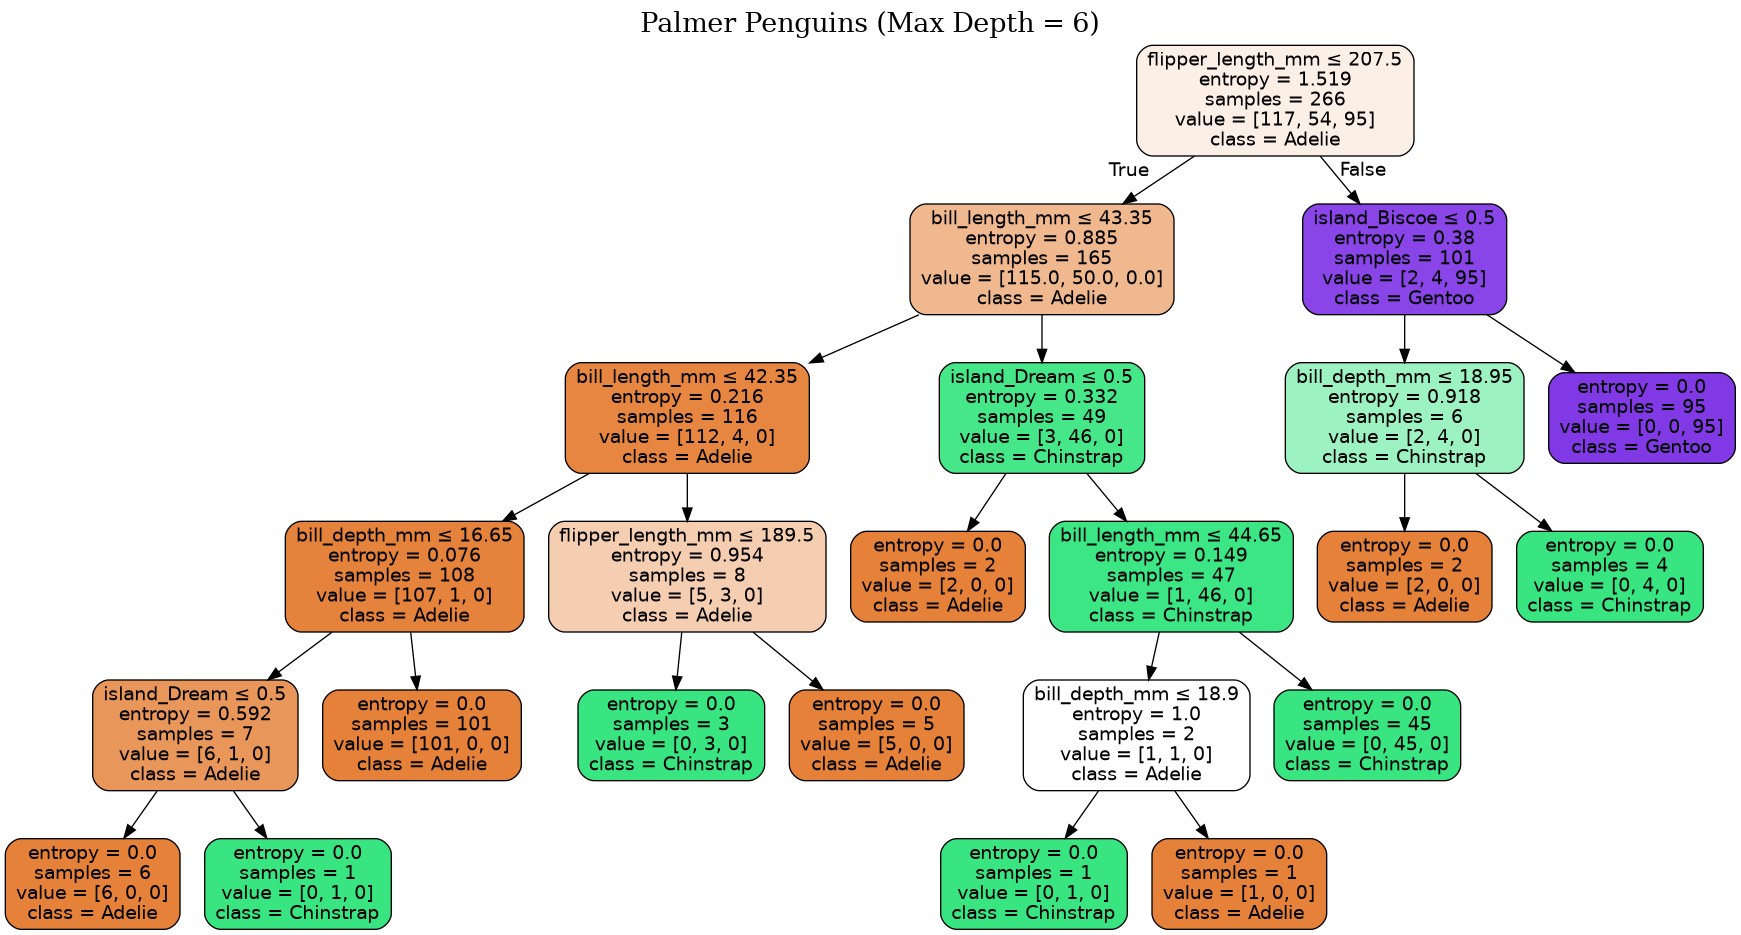

Max depth: 7, Accuracy: 0.93


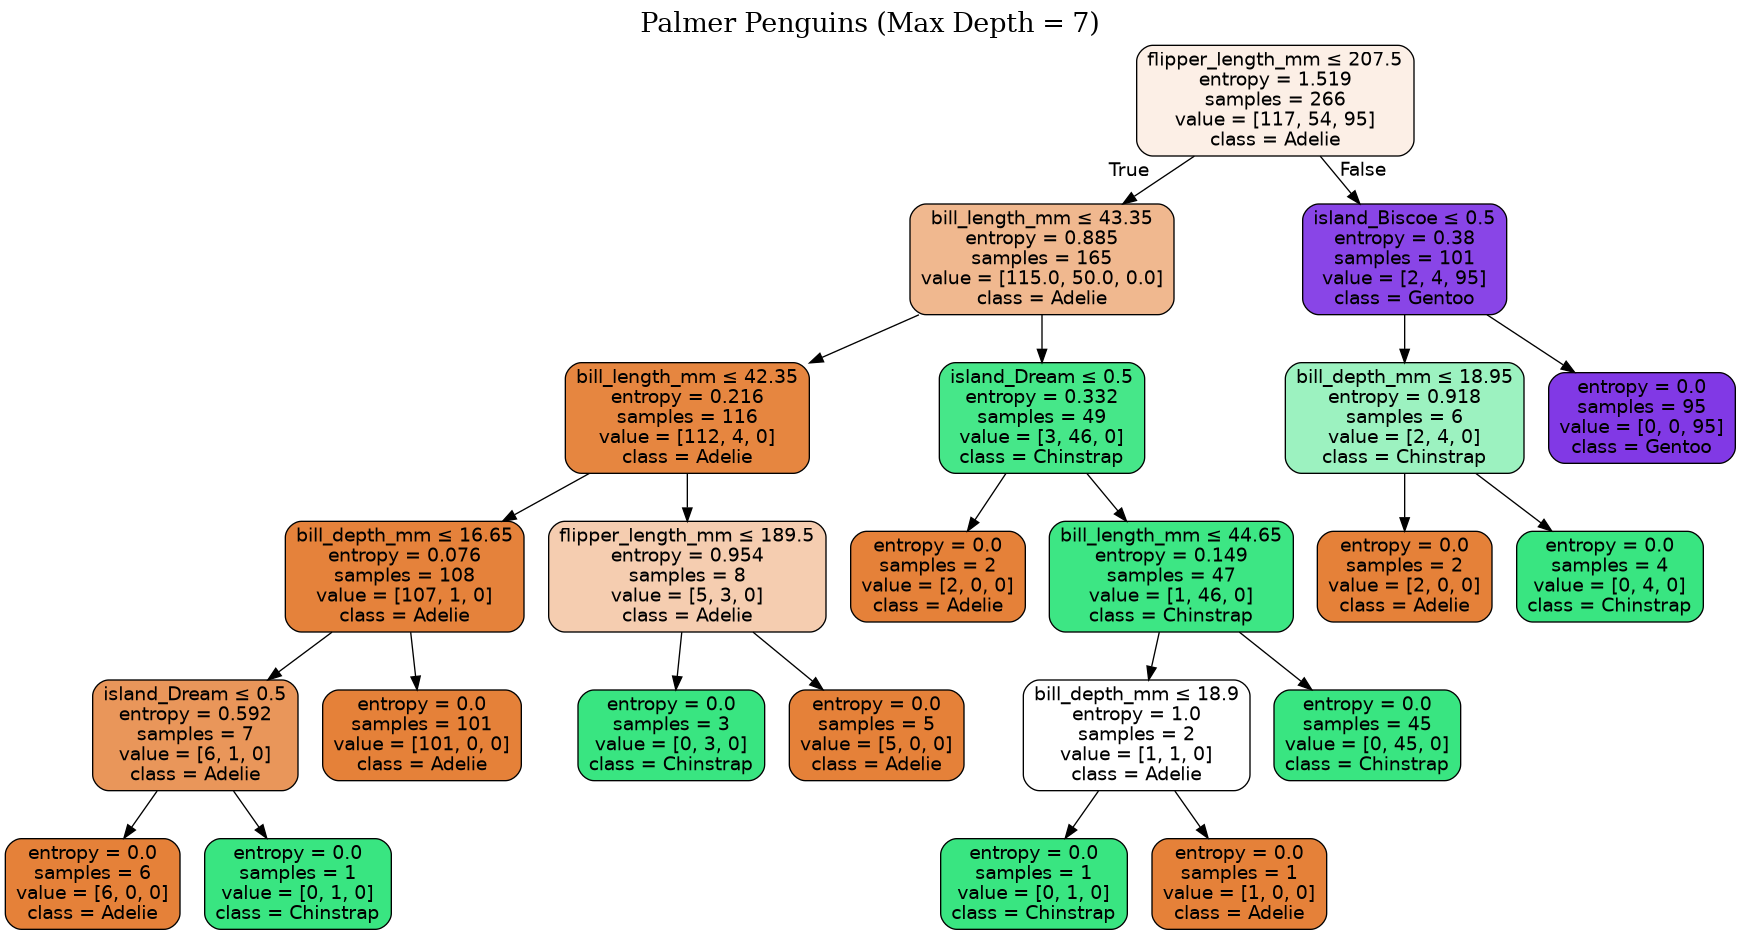

              None         2         3         4         5         6         7
accuracy  0.925373  0.940299  0.955224  0.970149  0.925373  0.925373  0.925373


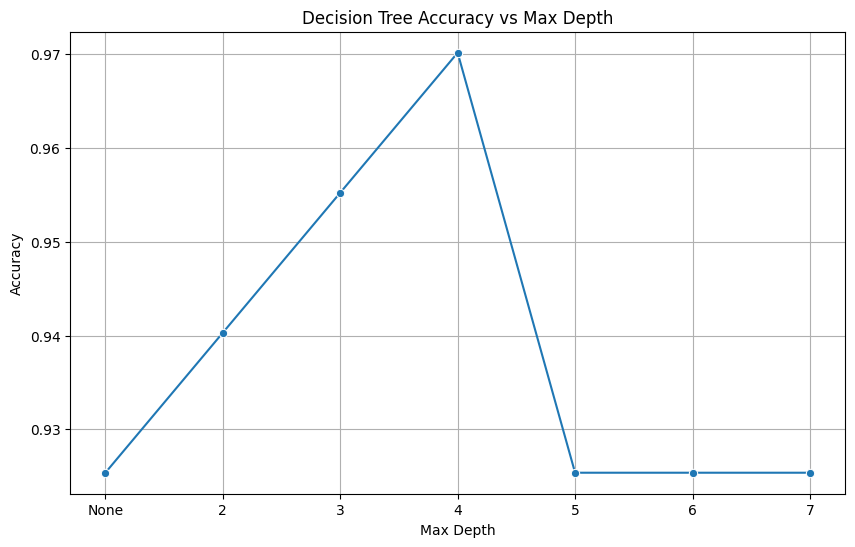

In [7]:
# Analyze accuracy vs max_depth
split_80 = split_results[0.8]
feature_train = split_80["feature_train"]
feature_test = split_80["feature_test"]
label_train = split_80["label_train"]
label_test = split_80["label_test"]

max_depths = [None, 2, 3, 4, 5, 6, 7]
depth_results = {}

for max_depth in max_depths:
    # Train
    clf_max_depth = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth, random_state=42)
    clf_max_depth.fit(feature_train, label_train)

    # Test
    prediction = clf_max_depth.predict(feature_test)

    # Evaluate
    accuracy = accuracy_score(label_test, prediction)
    print(f"Max depth: {max_depth}, Accuracy: {accuracy:.2f}")
    depth_results[str(max_depth)] = accuracy

    # Visualize the decision tree
    ## Save decision trees
    dtree_max_depth_dir = "../images/PalmerPenguins/DecisionTree/MaxDepth"
    os.makedirs(dtree_max_depth_dir, exist_ok=True)

    dtree_max_depth_file_name = f"dtree_{max_depth}"
    dtree_max_depth_file_path = os.path.join(dtree_max_depth_dir, dtree_max_depth_file_name)

    ## Title for the graph
    title = f"Palmer Penguins (Max Depth = {max_depth})"

    ## Create the decision tree graph
    dot_data = export_graphviz(
        clf_max_depth,
        out_file=None,
        feature_names= feature.columns,
        class_names= clf_max_depth.classes_,
        filled=True,
        rounded=True,
        special_characters=True
    )

    ## Add title to the graph
    dot_data_with_title = dot_data.replace(
        "digraph Tree {",
        f'digraph Tree {{\ngraph [label="{title}", labelloc=top, fontsize=20];'
    )

    ## Render the graph
    graph = Source(dot_data_with_title)
    graph.render(dtree_max_depth_file_path, format="png", cleanup=True)
    display(Image(filename=f"{dtree_max_depth_file_path}.png"))

# Save accuracy vs max_depth plot
max_depth_dir = "../images/PalmerPenguins/Accuracy"
os.makedirs(max_depth_dir, exist_ok=True)

## Table for accuracy vs max_depth
max_depth_table_df = pd.DataFrame(depth_results, index=["accuracy"])
print(max_depth_table_df)

## Plot accuracy vs max_depth
max_depth_file_name = "accuracy_vs_max_depth.png"
max_depth_file_path = os.path.join(max_depth_dir, max_depth_file_name)

max_depth_plot_df = pd.DataFrame({
    "max_depth": [str(k) for k in depth_results.keys()],
    "accuracy": list(depth_results.values())
})

plt.figure(figsize=(10, 6))
sns.lineplot(data=max_depth_plot_df, x="max_depth", y="accuracy", marker="o")
plt.title("Decision Tree Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.grid()
plt.savefig(max_depth_file_path)
plt.show()